In [2]:
import numpy as np

# Load the NPZ file
data = np.load('../../../data/embedding_data/unspsc_embeddings.npz')
unspsc_data = [data[f] for f in data.files]

In [3]:
import pickle

# Open the .pickle file for reading
with open('../../../data/embedding_data/unspsc_title_list.pickle', 'rb') as file:
    unspsc_titles = pickle.load(file)

In [4]:
print(np.shape(unspsc_data))
print(len(unspsc_titles))

(2336, 768)
2336


In [5]:
import pandas as pd
unspsc_pd = pd.DataFrame({"UNSPSC Title": unspsc_titles, "unspsc_emb": unspsc_data})

In [6]:
import pandas as pd

tenders_structured_path = r"../../../data/UpdatedAgainTenders.xlsx"

tenders_structured = pd.read_excel(tenders_structured_path)
tenders_structured = tenders_structured[["Reference Number", "Contract Title", "Description", "UNSPSC Title"]].dropna(subset=["Reference Number"]).drop_duplicates(subset=["Reference Number"])

from bs4 import BeautifulSoup
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned = soup.get_text().replace('\xa0', ' ')
    cleaned = ' '.join(cleaned.split())
    return cleaned

docs = []
for index, row in tenders_structured.iterrows():
    title = row["Contract Title"]
    desc = remove_html_tags(row["Description"])
    tenders_structured.at[index, "Description"] = desc
    docs.append(title + ". " + desc)

In [7]:
import numpy
bert_embs = numpy.load("../../../data/embedding_data/sent_transformer_embeddings.npz")
bert_embs = [bert_embs[f] for f in bert_embs.files]

tender_refs = open("../../../data/embedding_data/tender_references.txt", "r")
content = ""
for line in tender_refs:
    content = line
    break
    
content = content.replace("[", "")
content = content.replace("'", "")
content = content.replace(",", "")
refs = content.split(" ")

In [8]:
sd_embs = pd.DataFrame({"Reference Number": refs, "sd_emb": bert_embs})

In [9]:
combined = pd.merge(tenders_structured, unspsc_pd, on = "UNSPSC Title")
combined = pd.merge(combined, sd_embs, on = "Reference Number")

In [10]:
combined = combined.reset_index(drop=True)
combined

,Reference Number,Contract Title,Description,UNSPSC Title,unspsc_emb,sd_emb
0,ARA201901891,Supply and Delivery of Aspen Bedding Material,The Customer requires a Contractor to provide ...,Research animal bedding material,"[0.056964125, 0.017811134, 0.0065141907, -0.00...","[0.04173276, -0.020767255, -0.04720556, 0.0584..."
1,20221AGWA,Bar Consultancy and Staffing AGWA Rooftop Bar ...,The Art Gallery of Western Australia (AGWA) re...,Business and corporate management consultation...,"[0.012307737, -0.06005603, -0.0085970545, -0.0...","[0.08356551, 0.18301757, 0.0034148374, 0.01330..."
2,E05072022ACT,Procurement Of Consultancy Services for Strate...,"On 1 July 2022, the Perth Theatre Trust was ab...",Business and corporate management consultation...,"[0.012307737, -0.06005603, -0.0085970545, -0.0...","[0.13795552, 0.013483306, -0.05724118, -0.0433..."
3,CUATPS201907072022AC,Senior Policy Officer,Temporary engagement of a Senior Policy Office...,Business and corporate management consultation...,"[0.012307737, -0.06005603, -0.0085970545, -0.0...","[0.002643208, 0.01671921, -0.007894835, -0.058..."
4,CAHS202311117,High-Level Transition Plan for Specialised Inf...,High-Level Transition Plan for Specialised Inf...,Business and corporate management consultation...,"[0.012307737, -0.06005603, -0.0085970545, -0.0...","[0.0041359942, 0.0076163285, -0.0077497656, -0..."
...,...,...,...,...,...,...
20362,2021947WAM,Provision for Gas supply to Collections and Re...,Provision for Gas supply to Collections and Re...,Natural gas production services,"[-0.012834141, -0.0009790445, -0.00421543, 0.0...","[0.012311371, -0.04206978, 0.025609996, -0.011..."
20363,DPLH302920,Construction of a Replacement Steel Footbridge...,The Western Australian Planning Commission (WA...,Footbridge,"[-0.02981906, 0.012738478, -0.0032391194, 0.01...","[-0.017478287, 0.046908665, 0.0243664, 0.04562..."
20364,CUAICTS2021,WATC Client Portal Support Contract,WATC - Client Portal Support Contract,Computer support organization,"[0.029169315, -0.013054614, 0.0061823376, -0.0...","[0.052064676, -0.010032334, -0.0014293739, -0...."
20365,WATC1185,Checkpoint Firewall,Checkpoint Firewall Maintenance contract,Integrated maintenance information systems,"[-0.038856726, 0.015572124, -0.042956833, -0.0...","[-0.01910584, 0.015930783, -0.021380246, -0.05..."


In [11]:
# losing around 300 rows......

In [12]:
#unpack arrays 
unspsc_emb_np = combined[["unspsc_emb"]].values
unspsc_emb_np = np.block([[unpacked[0]] for unpacked in unspsc_emb_np])
sd_emb_np = combined[["sd_emb"]].values
sd_emb_np = np.block([[unpacked[0]] for unpacked in sd_emb_np])

In [13]:
print(np.shape(unspsc_emb_np))
print(np.shape(sd_emb_np))

(20367, 768)
(20367, 768)


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
unspsc_emb_dist = cosine_similarity(unspsc_emb_np)

In [15]:
sd_emb_dist = cosine_similarity(sd_emb_np)

In [16]:
divergence = unspsc_emb_dist - sd_emb_dist

In [17]:
divergence_argsorted = np.argsort(divergence, axis = None)

In [18]:
emb_d = np.shape(sd_emb_np)[0]
divergence_argsorted[1]//emb_d

13392

In [19]:
def display_tender(df, i):
    ref = df.at[i, "Reference Number"]
    title = df.at[i, "Contract Title"]
    unspsc_title = df.at[i, "UNSPSC Title"]
    desc = df.at[i, "Description"]
    print(ref)
    print(title)
    print(unspsc_title)
    print(desc)
    
def display_tender_from_div_i(i):
    emb_d = np.shape(sd_emb_np)[0]
    row = i % emb_d
    col = i // emb_d
    print(f"Divergence: {divergence[row, col]}")
    display_tender(combined, row)
    print()
    display_tender(combined, col)

In [26]:
display_tender_from_div_i(divergence_argsorted[-3])

Divergence: 1.1315454244613647
PTA220582
SmartRider Upgrade Project - Test Lead 
Management advisory services
SmartRider Upgrade Project - Test Lead

FINW0049323D
Department of Justice - Roebourne Regional Prison - Time Programming Services - Temperature Management PDP
Management advisory services
Department of Justice - Roebourne Regional Prison - Time Programming Services - Temperature Management PDP


In [21]:
flattened_divs = divergence.flatten()

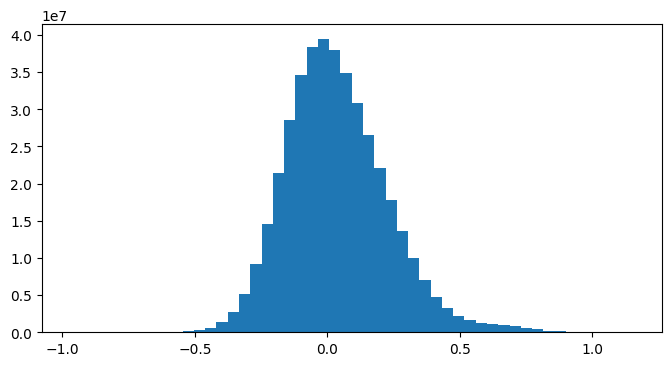

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(flattened_divs, bins = 50)
plt.show()